# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timedelta

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


676

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_weather_data = []
query_url = base_url + "appid=" + api_key + "&units=metric&q="

i=0

for item in cities:
    
    try:
       
        response = requests.get(query_url + item).json()
        city = response['name']
        cloudiness = response['clouds']['all']
        if cloudiness > 100:
            cloudiness = ""
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        if humidity > 100: 
            humidity = ""
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        
        print(f"Reading city number {i}: {item}")
            
        dict = {"City":city, "Cloudiness":cloudiness, "Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,
           "Max Temp":max_temp,"Wind Speed":wind_speed}

        city_weather_data.append(dict)
        
        i += 1
  
    except:
        
        print(f'error reading city: {item}')
     
    time.sleep(1)

Reading city number 0: vestmannaeyjar
error reading city: taolanaro
Reading city number 1: new norfolk
Reading city number 2: dikson
Reading city number 3: saskylakh
Reading city number 4: sorland
Reading city number 5: busselton
Reading city number 6: hermanus
Reading city number 7: neuquen
Reading city number 8: cape town
Reading city number 9: bacolod
Reading city number 10: rikitea
Reading city number 11: punta arenas
Reading city number 12: weligama
error reading city: grand river south east
Reading city number 13: alugan
Reading city number 14: jamestown
Reading city number 15: ushuaia
Reading city number 16: port alfred
error reading city: quixada
Reading city number 17: aklavik
Reading city number 18: port blair
Reading city number 19: kachug
Reading city number 20: hobart
Reading city number 21: coquimbo
Reading city number 22: wuchang
Reading city number 23: cuauhtemoc
Reading city number 24: bredasdorp
Reading city number 25: mataura
error reading city: mys shmidta
error rea

Reading city number 223: sao filipe
Reading city number 224: deputatskiy
error reading city: barentsburg
Reading city number 225: waipawa
Reading city number 226: dubbo
Reading city number 227: san juan
Reading city number 228: revelstoke
Reading city number 229: janauba
Reading city number 230: vilyuysk
Reading city number 231: cortez
Reading city number 232: panama city
Reading city number 233: storm lake
Reading city number 234: kruisfontein
Reading city number 235: gat
Reading city number 236: bemidji
Reading city number 237: ormara
error reading city: tarusan
Reading city number 238: kamina
Reading city number 239: ouadda
Reading city number 240: nyaunglebin
Reading city number 241: khromtau
Reading city number 242: fez
Reading city number 243: camacha
error reading city: doctor pedro p. pena
Reading city number 244: saint-francois
Reading city number 245: bambous virieux
error reading city: bengkulu
Reading city number 246: avila
error reading city: olafsvik
Reading city number 2

Reading city number 441: orsha
Reading city number 442: abha
Reading city number 443: vanimo
error reading city: utiroa
Reading city number 444: bar harbor
Reading city number 445: basoko
Reading city number 446: kathu
Reading city number 447: yerbogachen
Reading city number 448: zheleznodorozhnyy
Reading city number 449: madiun
Reading city number 450: pliska
Reading city number 451: catalina
Reading city number 452: port macquarie
Reading city number 453: ambon
Reading city number 454: limanowa
Reading city number 455: ciudad bolivar
Reading city number 456: havre-saint-pierre
Reading city number 457: portoferraio
Reading city number 458: kupang
Reading city number 459: srednekolymsk
Reading city number 460: nantucket
Reading city number 461: russell
Reading city number 462: artyom
Reading city number 463: havre
Reading city number 464: arica
Reading city number 465: luwuk
error reading city: nizhneyansk
Reading city number 466: eaglesham
Reading city number 467: mandalgovi
Reading c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df['Date'] = pd.to_datetime(city_weather_data_df['Date'],unit='s')
city_weather_data_df['Date'] = city_weather_data_df['Date'].dt.date
city_weather_data_df.to_csv(output_data_file)
city_weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vestmannaeyjar,100,IS,2019-10-09,81,63.44,-20.27,9.04,3.030
1,New Norfolk,75,AU,2019-10-09,58,-42.78,147.06,13.33,6.200
2,Dikson,94,RU,2019-10-09,86,73.51,80.55,-5.72,6.090
3,Saskylakh,89,RU,2019-10-09,95,71.97,114.09,-7.98,2.425
4,Sorland,20,NO,2019-10-09,69,67.67,12.69,3.00,3.600
...,...,...,...,...,...,...,...,...,...
595,Kamenka,7,MD,2019-10-09,82,48.03,28.70,4.44,3.920
596,Sosua,75,DO,2019-10-09,94,19.77,-70.52,27.78,2.100
597,Gualeguay,41,AR,2019-10-09,64,-33.15,-59.31,14.43,1.800
598,The Valley,40,AI,2019-10-09,74,18.22,-63.06,29.00,3.100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [5]:
date2 = datetime.fromtimestamp(date).strftime('%m/%d/%Y')


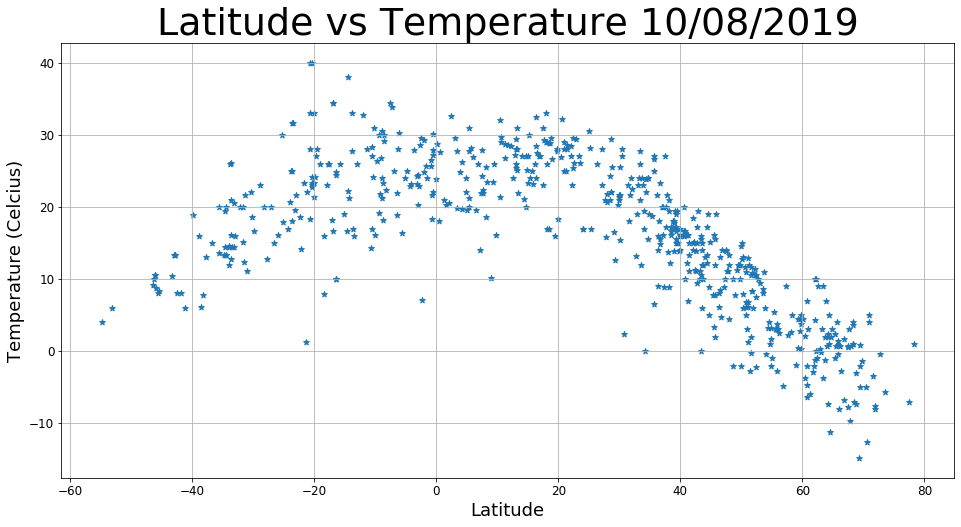

In [10]:

plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Max Temp'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Temperature", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Temperature (Celcius)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

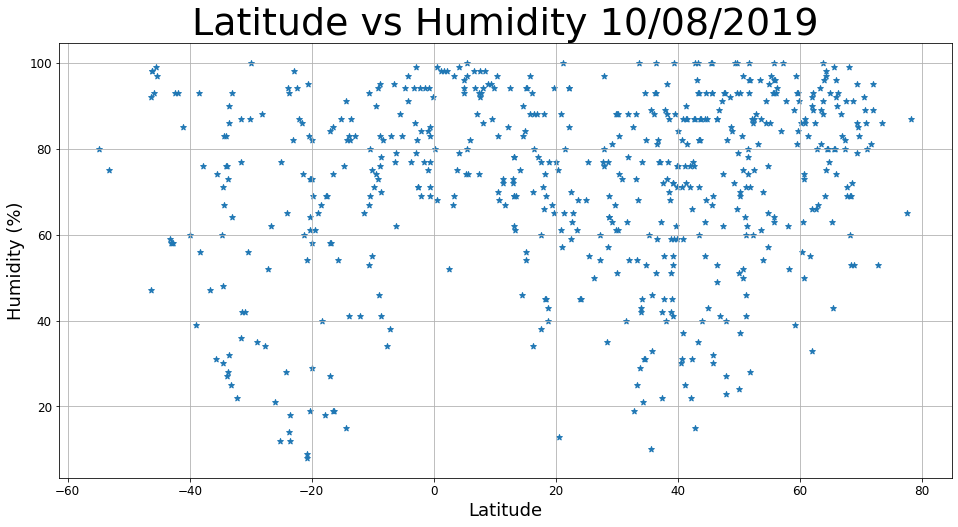

In [7]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Humidity'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Humidity", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Humidity (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

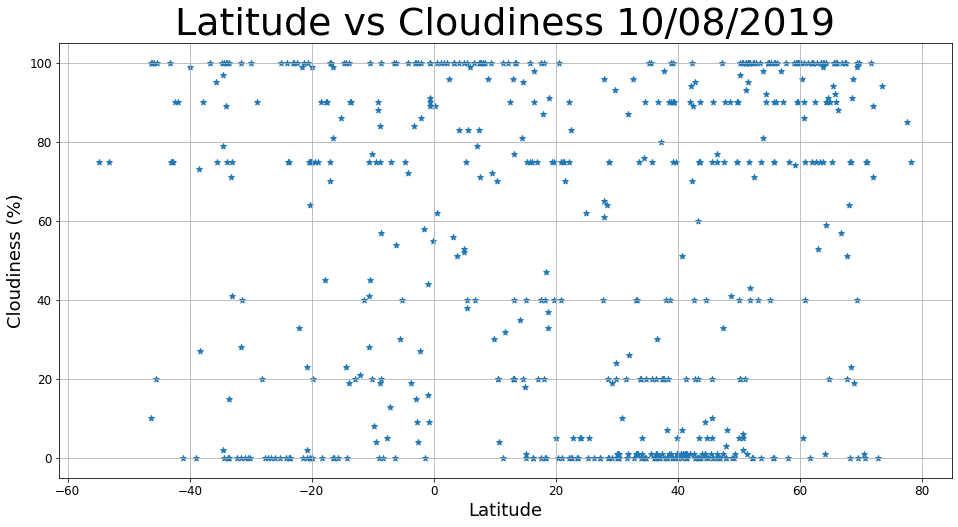

In [8]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Cloudiness'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Cloudiness", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Cloudiness (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

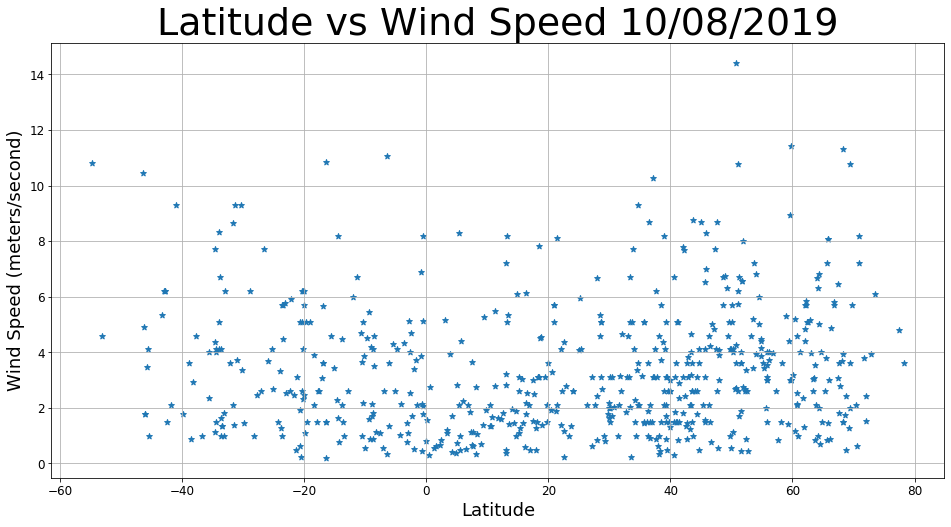

In [9]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Wind Speed'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Wind Speed", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Wind Speed (meters/second)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Images/WindSpeed.png")
plt.show()

Observations:

1: Some of the openweather entries contain % Humidity that is above 100%, which is not possible and which skews the visualization of the data.   As such, I exclude any values over 100% on Humidity or Cloudiness.

2: The scatterplot for temperature vs latitude reflect the expected result of high values at the equator and low values at the polls.  This was just as pronounced when a small number of datapoints was plotted as it was when 500+ points were plotted.

3: The scatterplot for humidity vs. latitude reflects a less pronounced trend, but closer to the equator, humidity is more consistently high, in comparison to spots more distant from the equator.  In earlier runs of the data with less than 500 points, this was unpronounced and no such observation was possible, but becomes clearer with a large number of datapoints.   There does not appear to be a correlation between latitude and either cloudiness or wind speed.


